# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [3]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [4]:
# En esta celda cargá el regresor y realizá el entrenamiento

from sklearn.tree import DecisionTreeRegressor

rgr_tree = DecisionTreeRegressor(criterion= 'mse')
rgr_tree.fit(X_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [5]:
# Acá realizá la predicción

y_train_pred_tree = rgr_tree.predict(X_train)
y_test_pred_tree = rgr_tree.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [6]:
# En esta celda calculá el rmse

from sklearn.metrics import mean_squared_error
import math 

rmse_train=math.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_test=math.sqrt(mean_squared_error(y_test, y_test_pred_tree))

print('Error en datos de train:', rmse_train)
print('Error en datos de test:', rmse_test)

Error en datos de train: 540.0355362913781
Error en datos de test: 26229.025237908558


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [7]:
rmses_train=[]
rmses_test=[]

for k in [5,10,15,20,25,30]:
    rgr_tree = DecisionTreeRegressor(criterion= 'mse', max_depth=k)
    rgr_tree.fit(X_train,y_train)
    
    y_train_pred_tree = rgr_tree.predict(X_train)
    y_test_pred_tree = rgr_tree.predict(X_test)
    
    rmses_train.append(math.sqrt(mean_squared_error(y_train, y_train_pred_tree)))
    rmses_test.append(math.sqrt(mean_squared_error(y_test, y_test_pred_tree)))

print(rmses_train)
print(rmses_test)

import numpy as np

rmses_train=np.array(rmses_train)
rmses_test=np.array(rmses_test)


[21060.874930571386, 15613.397608509867, 9012.49413902559, 3577.1705604878052, 819.4510830001899, 540.0355362913781]
[22780.98729049726, 22416.87795092556, 24545.311030822744, 26039.737010055112, 26287.303746740912, 25801.54188604878]


Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

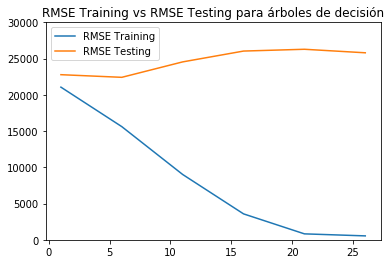

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [9]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda

from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=2)
reg.fit(X_train,y_train) 

y_train_pred_knn = reg.predict(X_train)
y_test_pred_knn = reg.predict(X_test)

rmse_train=math.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_test=math.sqrt(mean_squared_error(y_test, y_test_pred_tree))

print('Error en datos de train:', rmse_train)
print('Error en datos de test:', rmse_test)



Error en datos de train: 540.0355362913781
Error en datos de test: 25801.54188604878


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [10]:
# Calculá los cambio en el rmse en esta celda

rmses_train=[]
rmses_test=[]

for k in range(1,30,1):
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train,y_train) 
    
    y_train_pred_knn = reg.predict(X_train)
    y_test_pred_knn = reg.predict(X_test)
        
    rmses_train.append(math.sqrt(mean_squared_error(y_train, y_train_pred_knn)))
    rmses_test.append(math.sqrt(mean_squared_error(y_test, y_test_pred_knn)))
    

print(rmses_train)
print(rmses_test)


[727.5347594957301, 13491.097602741382, 16206.813296596363, 17619.841332916814, 18494.743644450915, 19066.262950443997, 19478.579585413783, 19849.92446525831, 20142.823555761905, 20412.005991718375, 20661.769115013907, 20839.86278072486, 20999.177034918845, 21168.298431569685, 21256.35242485292, 21371.335628984703, 21484.92396149295, 21573.58491356051, 21650.63161571382, 21693.235120624442, 21742.171267704427, 21794.245990747666, 21881.988697579283, 21948.164853810584, 22016.571308109604, 22098.57949467493, 22162.985893435354, 22233.700827655222, 22278.738857081305]
[28719.570721278164, 25975.619533818204, 24603.40360447315, 23988.07782214114, 23573.679530157235, 23588.753512814124, 23650.576893232213, 23737.5995082763, 23622.64164812466, 23713.5031093202, 23592.727494774335, 23580.09099105699, 23647.067212892325, 23731.755360249175, 23740.732784343854, 23771.279815644597, 23793.939894646075, 23864.90118811907, 23842.323902180924, 23901.895231689457, 23939.490354372992, 23953.880813043

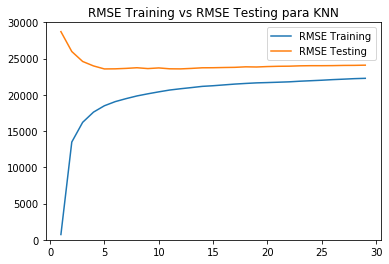

In [11]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [12]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [13]:
# Calculá en esta celda los cross_val_score

from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(max_depth = 5) 
regressor.fit(X_train, y_train) 

score = cross_val_score(regressor, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
score = nmsq2rmse(score)

print(score)

[20691.28357379 21428.90526132 21475.76012108 21832.41442464
 22154.71258458 22898.86708978 22881.97771207 21444.43623418
 21159.25793502 22197.71701465]


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [14]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [15]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [16]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,66000.000,67715.385,1715.385
1,109000.000,119816.186,10816.186
2,87000.000,95916.108,8916.108
3,119000.000,85474.718,33525.282
4,69000.000,119816.186,50816.186
5,135000.000,119816.186,15183.814
6,156000.000,143768.170,12231.830
7,120064.000,100710.974,19353.026
8,62000.000,75757.847,13757.847
9,110000.000,153694.958,43694.958
